We will create a system of models that recieves as an input a 60x60x3 (rgb) array that represents a png picture of a human's face and returns 0 if the person wears a mask incorrectly, 1 if the person wears a mask with the correct way and 2 if the person does not wear a mask at all

The models that constitute this system will be saved in h5 format. Mind that since we will exploit a custom activation function (Lecun) in somde of the models, when loading them we have to firstly define Lecun and then load it as well as a custom object

Firstly, some preliminary words about this notebook:

a) At first we downloaded  the dataset exploited from https://www.kaggle.com/andrewmvd/face-mask-detection. This consists of 2  directories. One called images and includes the images of the dataset in a png form. The other is called annotations and   contains annotations for these images in xml version. Both these directories were saved inside the directory where this notebook is saved. More specifically, if this notebook is saved in the path ......./directory/notebook, then the above mentioned directories are saved in the path ....../directory/kaggle/input/....

Let's take a look at that in the following code


In [1]:
import os

ipynb_path = os.path.dirname(os.path.realpath("__file__"))
ipynb_path=ipynb_path.replace("\\", "/") 
data_path=ipynb_path+'/kaggle/'
data_path

for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\annotations\maksssksksss0.xml
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\annotations\maksssksksss1.xml
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\annotations\maksssksksss10.xml
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\annotations\maksssksksss100.xml
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\annotations\maksssksksss101.xml
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\annotations\maksssksksss102.xml
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\annotations\maksssksksss103.xml
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHI

C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\images\maksssksksss217.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\images\maksssksksss218.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\images\maksssksksss219.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\images\maksssksksss22.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\images\maksssksksss220.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\images\maksssksksss221.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\images\maksssksksss222.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVE

C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\images\maksssksksss783.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\images\maksssksksss784.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\images\maksssksksss785.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\images\maksssksksss786.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\images\maksssksksss787.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\images\maksssksksss788.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/input\images\maksssksksss789.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIV

C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss169-366.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss17-367.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss170-368.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss171-369.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss172-370.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss173-371.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\mak

C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss296-1072.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss296-1073.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss296-1074.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss296-1075.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss296-1076.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss296-1077.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_ima

C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss435-1777.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss435-1778.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss436-1779.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss436-1780.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss437-1781.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss437-1782.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_ima

C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss555-2443.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss555-2444.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss556-2445.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss556-2446.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss556-2447.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss556-2448.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_ima

C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss695-3198.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss695-3199.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss695-3200.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss695-3201.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss695-3202.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss695-3203.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_ima

C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss800-3776.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss800-3777.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss801-3778.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss801-3779.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss801-3780.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_images\maksssksksss801-3781.png
C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working\cropped_ima

So anyone wishing to run the exact same code of this notebook, all he has to do is simply save the directories 'images' and 'annotations' to the path ../directory/kaggle/input/  (as mentioned above directory is the folder in which this notebook will be saved in his desktop)

b) Then all the other folders and directories will be created automatically, including the new folder with the cropped images that will serve as a train and test dataset.

c) So let's proceed to the deployment of the model. Firstly we will type all the necessary imports that will be used for data preprocessing and developing of the model.


In [2]:
import pandas as pd
import numpy as np
import cv2
from skimage import io
import os
import glob
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers.merge import concatenate
from keras.layers import Dense
from keras.models import Model
from keras.layers import Input
import keras.layers as l
import keras.models as m
import tensorflow  
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from keras.layers import Activation
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from xml.etree import ElementTree
from tensorflow.keras.models import load_model
import imageio
from keras_preprocessing.image import ImageDataGenerator
from pathlib import Path
from random import randint
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from imblearn.over_sampling import SMOTE
from collections import Counter

In [3]:
#these string variables that indicate the path to the annotations and images folder will be useful for our next steps
annotations_directory = data_path+ 'input/annotations'
images_directory =  data_path+ 'input/images'

We will create a dictionary that will contain all information gathered from the xml annotations of the kaggle dataset 

In [4]:
information = {'xmin': [], 'ymin': [], 'xmax': [], 'ymax': [], 'label': [], 'file': [], 'width': [], 'height': []}

for annotation in glob.glob(annotations_directory + '/*.xml'):
    tree = ElementTree.parse(annotation)
    
    for element in tree.iter():
        if 'size' in element.tag:
            for attribute in list(element):
                if 'width' in attribute.tag: 
                    width = int(round(float(attribute.text)))
                if 'height' in attribute.tag:
                    height = int(round(float(attribute.text)))
        if 'object' not in element.tag:
            for attribute in list(element):
                if 'name' in attribute.tag:
                    file= attribute.text[:-4]

        if 'object' in element.tag:
            for attribute in list(element):
                
                if 'name' in attribute.tag:
                    name = attribute.text                 
                    information['label'] += [name]
                    information['width'] += [width]
                    information['height'] += [height] 
                    information['file'] += [file] 
                            
                if 'bndbox' in attribute.tag:
                    for dimension in list(attribute):
                        if 'xmin' in dimension.tag:
                            xmin = int(round(float(dimension.text)))
                            information['xmin'] += [xmin]
                        if 'ymin' in dimension.tag:
                            ymin = int(round(float(dimension.text)))
                            information['ymin'] += [ymin]                                
                        if 'xmax' in dimension.tag:
                            xmax = int(round(float(dimension.text)))
                            information['xmax'] += [xmax]                                
                        if 'ymax' in dimension.tag:
                            ymax = int(round(float(dimension.text)))
                            information['ymax'] += [ymax]
    

Now we will create a Dataframe that will contain this information. Mind that some annotations appear more than once since there are multiple people inside the picture whose faces are portrayed

In [5]:
annotations_df = pd.DataFrame(information)
annotations_df.tail(10)

,xmin,ymin,xmax,ymax,label,file,width,height
4062,251,88,282,124,without_mask,maksssksksss96,400,280
4063,296,153,335,195,with_mask,maksssksksss96,400,280
4064,187,83,212,109,with_mask,maksssksksss97,301,400
4065,196,43,236,91,with_mask,maksssksksss98,400,267
4066,41,73,65,95,with_mask,maksssksksss98,400,267
4067,263,62,287,85,with_mask,maksssksksss98,400,267
4068,344,80,377,106,with_mask,maksssksksss98,400,267
4069,181,54,273,162,mask_weared_incorrect,maksssksksss99,400,267
4070,99,87,176,165,with_mask,maksssksksss99,400,267
4071,289,99,355,233,with_mask,maksssksksss99,400,267


Now we will add a column containing the exact file name of the xml anonotation file of each row as well as the picture file name. Moreover, we change the name of a label to be gramatically correct

In [6]:
annotations_df['annotation_file'] = annotations_df['file'] + '.xml'
annotations_df['image_file'] = annotations_df['file'] + '.png'

annotations_df.loc[annotations_df['label'] == 'mask_weared_incorrect', 'label'] = 'mask_incorrectly_worn'

In [7]:
annotations_df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,79,105,109,142,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png
1,185,100,226,144,with_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png
2,325,90,360,141,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png
3,321,34,354,69,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png
4,224,38,261,73,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png
5,299,58,315,81,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png
6,143,74,174,115,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png
7,74,69,95,99,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png
8,191,67,221,93,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png
9,21,73,44,93,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png


In [8]:
len(annotations_df)

4072

So we have 4072 instances in our dataframe, meaning that there is a total number of 4072 human faces in our pictures.

Now let's create a function that takes the path in which the png file is saved in the pc directory, and uses it to print the picture as well as illustrate with a rectangle the parts inside the picture where a person's face is shown. For that case the annotations_df will be employed, because as mentioned above, each row is the instance of a person's face in a picture, where the respective dimensions inside the picture are taken

In [9]:
def render_image(image_path):
    image_path=image_path.replace('\\','/')
    image = io.imread(image_path)
    img=image_path.split('/')[-1]
    #print(image.shape)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    bound_box=[]
    for i in annotations_df[annotations_df['image_file']==img].index:
        (x,y,width,height)=(annotations_df.loc[i].xmin,annotations_df.loc[i].ymin,
                        annotations_df.loc[i].xmax,annotations_df.loc[i].ymax)
        bound_box.append((x,y,width,height))  
        if annotations_df.loc[i].label=='with_mask':
            cv2.rectangle(image, (x,y), (x+width, y+height), (0, 200, 0), 2)
            cv2.putText(image, org = (x-8 , y-8), text = "Mask", 
                    fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 0.5, color = (0, 200, 0))
        elif annotations_df.loc[i].label=='mask_incorrectly_worn':
            cv2.rectangle(image, (x,y), (x+width, y+height), (255, 255, 0), 2)
            cv2.putText(image, org = (x - 8, y - 3), text = 'Incorrect', 
                    fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 0.5, color = (255, 255, 0))
        else:
            cv2.rectangle(image, (x,y), (x+width, y+height), (200, 0, 0), 2)
            cv2.putText(image, org = (x - 8, y - 3), text = 'No mask', 
                    fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 0.5, color = (200, 0, 0))
        
    plt.figure(figsize=(5,5))
    plt.imshow(image)
    plt.show()
    
    return bound_box,image

Now let's create a list that will contain all the images that have exactly 3 human faces in them and let's print 3 random of them  along with their inner sqaures containing the human faces

In [10]:
images_with_3=[]
for _ in annotations_df['image_file'].value_counts().index:
    if annotations_df[annotations_df['image_file']==_].shape[0]==3:
        images_with_3.append(_)

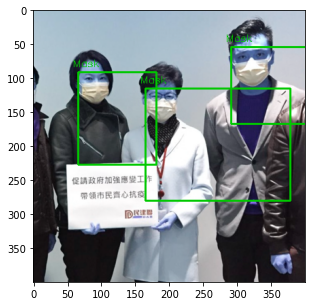

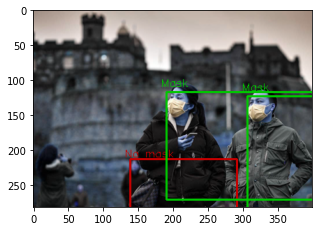

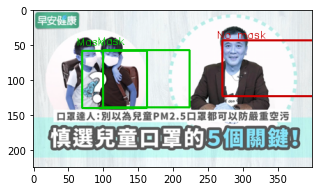

In [11]:
for i in images_with_3[5:8]:
    render_image(os.path.join(images_directory,i))

Now let's show a way to extract only the part of the pictures that have the faces in them. This will be quite useful since we will build a new database only with the faces and their respective label

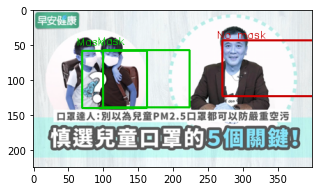

In [13]:
bound_box,image=render_image(os.path.join(images_directory,i))

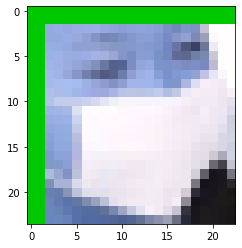

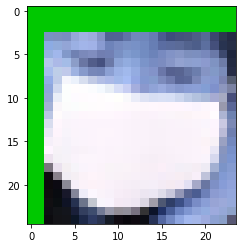

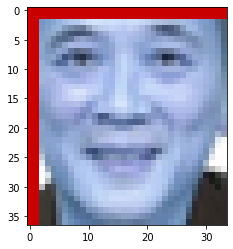

In [14]:
for i in bound_box:
    cropped = image[i[1]:i[3],i[0]:i[2]]
    plt.imshow(cropped)
    plt.show()

Now let's create a directory (called 'cropped_images') inside the directory where our notebook is created. This will be made of all the cropped images of all the faces that exist in the pictures of our dataset

In [15]:
directory = 'cropped_images'
ipynb_path = os.path.dirname(os.path.realpath("__file__"))
ipynb_path=ipynb_path.replace("\\", "/") 
data_path=ipynb_path+'/kaggle/'
parent_directory = data_path+'working'
cropped_path = os.path.join(parent_directory, directory)
cropped_path=cropped_path.replace('\\','/')
Path(cropped_path).mkdir(parents=True, exist_ok=True)

So we will create a new column in our dataframe that will be used to save the name of the new cropped images that we will create and save in the above created folder named cropped_images

In [16]:
annotations_df['cropped_image_file'] = annotations_df['file']
annotations_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
0,79,105,109,142,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0
1,185,100,226,144,with_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0
2,325,90,360,141,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0
3,321,34,354,69,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1
4,224,38,261,73,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1
...,...,...,...,...,...,...,...,...,...,...,...
4067,263,62,287,85,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98
4068,344,80,377,106,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98
4069,181,54,273,162,mask_incorrectly_worn,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99
4070,99,87,176,165,with_mask,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99


In [17]:
for i in range(len(annotations_df)):
    # Get The File Path and Read The Image
    image_filepath = data_path+'/input/images/' + annotations_df['image_file'].iloc[i]
    image = io.imread(image_filepath)
    
    # Set The Cropped Image File Name
    annotations_df['cropped_image_file'].iloc[i] = annotations_df['cropped_image_file'].iloc[i] + '-' + str(i) + '.png'
    cropped_image_filename = annotations_df['cropped_image_file'].iloc[i]
    
    # Get The xmin, ymin, xmax, ymax Value (Bounding Box) to Crop Image
    xmin = annotations_df['xmin'].iloc[i]
    ymin = annotations_df['ymin'].iloc[i]
    xmax = annotations_df['xmax'].iloc[i]
    ymax = annotations_df['ymax'].iloc[i]

    # Crop The Image Based on The Values Above
    cropped_image = image[ymin:ymax, xmin:xmax]
    
    cropped_image_directory = os.path.join(cropped_path, cropped_image_filename) 
    io.imsave(cropped_image_directory, cropped_image)


C:\Users\kosta\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\kosta\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working/cropped_images\maksssksksss64-2946.png is a low contrast image
C:\Users\kosta\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: C:/Users/kosta/Desktop/epid/ΜΕΤΑΠΤΥΧΙΑΚΟ/MACHINE LEARNING/ASSIGNMENT_2/DELIVERED/EXERCISE_3/kaggle/working/cropped_images\maksssksksss64-2947.png is a low contrast image


Let's see how the name in the column of the cropped images has changed for every image

In [18]:
annotations_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
0,79,105,109,142,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0-0.png
1,185,100,226,144,with_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0-1.png
2,325,90,360,141,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png,maksssksksss0-2.png
3,321,34,354,69,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1-3.png
4,224,38,261,73,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1-4.png
...,...,...,...,...,...,...,...,...,...,...,...
4067,263,62,287,85,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98-4067.png
4068,344,80,377,106,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png,maksssksksss98-4068.png
4069,181,54,273,162,mask_incorrectly_worn,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99-4069.png
4070,99,87,176,165,with_mask,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png,maksssksksss99-4070.png


In [19]:
image_target_size = (int(60), int(60))
image_target_size

(60, 60)

So since our dataset consists of images of various sizes, a preprocessing is necessary in order to normalize all our data and have a same norm for them. We will use the preprocessing feature of keras called ImageDataGenerator. Our image_target_size will be 60x60

In [20]:
Image_generator=ImageDataGenerator(rescale = 1. / 255.)
data=Image_generator.flow_from_dataframe(dataframe = annotations_df,
    directory = cropped_path,
    x_col = 'cropped_image_file',
    y_col = 'label',target_size = image_target_size,batch_size=len(annotations_df))


Found 4072 validated image filenames belonging to 3 classes.


In [21]:
X=data[0][0]
y=data[0][1]

Class=1, n=3232 (79.371%)
Class=0, n=123 (3.021%)
Class=2, n=717 (17.608%)


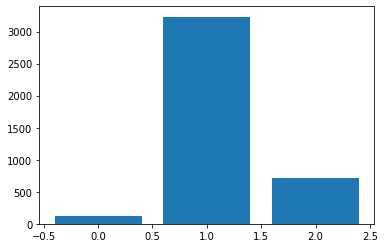

In [22]:
counter = Counter(np.argmax(y, axis=1))
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

As shown above, our dataset is highly imbalanced. So we will oversample it. And since smote technique can take as input an X array of max 2-d, we will firstly flatten X data

In [23]:
X=X.reshape(len(X),len(X[0])*len(X[0][0])*len(X[0][0][0]))

In [24]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


Now let's see the oversampled dataset

Class=1, n=3232 (33.333%)
Class=0, n=3232 (33.333%)
Class=2, n=3232 (33.333%)


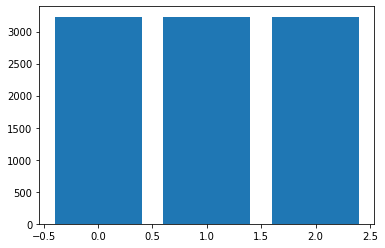

In [25]:
counter = Counter(np.argmax(y, axis=1))
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Ok now let's transform X-dataset's dimensions to their original form

In [26]:
X=X.reshape(len(X),60,60,3)

Ok let's create our train and test sets

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


In [28]:
#We create a function that only returns the function itself (lecun). We will use as the activation function of some of
#our models

def Lecun_(x):
    tan_h=K.tanh(x) #hyperbolic tan function
    t=1.7159*(tan_h)+0.01*x #lecun function
    return t

#We will also create a function called activation_generator that will randomly and equi-probably return as activation function
#either relu or tanh

def activation_generator():
    number=randint(0,1)
    if number==0:
        return 'relu'
    else:
        return 'tanh'
    

Now let's create 3 functions that create and fit 3 models of different architecture each. Our system of models that will be exploited for predicitons in the next steps, will consist of 9 models, meaning that this functions will be executed 3 times each. Then these models will be saved in the same directory that this notebook is saved, in a subdirectory called models_new. All this happen in order to avoid GAN attacks .

In [29]:
#from tensorflow.keras.utils import get_custom_objects

def fit_model_0(X_train,Y_train,X_test,Y_test):
    #get_custom_objects().update({'lecun':Lecun_})
    # define model
    Input = l.Input(shape=(60, 60, 3))
    hidden = l.Conv2D(32, (3,3), padding='same',activation=Lecun_)(Input)
    hidden = l.MaxPooling2D((6,6))(hidden)
    hidden = l.Conv2D(64, (3,3), padding='same',activation=Lecun_)(hidden)
    hidden = l.MaxPooling2D((3,3))(hidden)
    hidden = l.Flatten()(hidden)
    output = l.Dense(3, activation='softmax')(hidden)
    model = m.Model(Input, output)
    model.compile(
    loss='categorical_crossentropy',
    optimizer=tensorflow.keras.optimizers.Adam(),    
    metrics=["accuracy"]
)

    # fit model
    model.fit(X_train,Y_train, epochs = 8,batch_size=32,
                     validation_data = (X_test,Y_test))
    return model



    
    


def fit_model_1 (X_train,Y_train,X_test,Y_test):
    # define model
    
    mb = MobileNetV2(weights='imagenet',include_top=False, input_shape=(60, 60, 3))
    for layer in mb.layers:
        layer.trainable = False
    Input = l.Input(shape=(60, 60, 3))
    hidden= mb(Input)
    hidden = l.AveragePooling2D(pool_size=(2, 2))(hidden)
    hidden = l.Flatten()(hidden)
    hidden = l.Dense(256, activation="relu")(hidden)
    hidden = l.Dropout(0.25)(hidden)
    output = l.Dense(3, activation='softmax')(hidden)
    model = m.Model(Input, output)
    model.compile(
    loss='categorical_crossentropy',
    optimizer=tensorflow.keras.optimizers.Adam(),    
    metrics=["accuracy"]
)
    

    # fit model
    model.fit(X_train,Y_train, epochs = 8,batch_size=32,
                     validation_data = (X_test,Y_test))
    return model


def fit_model_2(X_train,Y_train,X_test,Y_test):
    #get_custom_objects().update({'lecun':Lecun_})
    # define model
    Input = l.Input(shape=(60, 60, 3))
    hidden = l.Conv2D(32, (3,3), padding='same',activation=activation_generator())(Input)
    hidden = l.MaxPooling2D((2,2))(hidden)
    hidden = l.Conv2D(64, (3,3), padding='same',activation=activation_generator())(hidden)
    hidden = l.MaxPooling2D((2,2))(hidden)
    hidden = l.Conv2D(128, (3,3), padding='same',activation=activation_generator())(hidden)
    hidden = l.MaxPooling2D((2,2))(hidden)
    hidden = l.Conv2D(256, (3,3), padding='same',activation=activation_generator())(hidden)
    hidden = l.MaxPooling2D((3,3))(hidden)
    hidden = l.Flatten()(hidden)
    output = l.Dense(3, activation='softmax')(hidden)
    model = m.Model(Input, output)
    model.compile(
    loss='categorical_crossentropy',
    optimizer=tensorflow.keras.optimizers.Adam(),    
    metrics=["accuracy"]
)

   # fit model
    model.fit(X_train,Y_train, epochs = 8,batch_size=32,
                     validation_data = (X_test,Y_test))
    return model


In [38]:
#YOU DO NOT NEED TO RUN THIS CODE IF YOU HAVE DONE THIS ONCE SINCE IT SERVES ONLY FOR SAVING THE MODELS IN YOUR WORKING
#DIRECTORY. IF YOU HAVE DONE IT ONCE SKIP AND PROCEED TO THE NEXT NOTEBOOK OF THE EXERCISE

n_members = 3

for i in range(n_members):
    # fit model_0
    model=fit_model_0(x_train,y_train,x_test,y_test)
    # save model
    filename = 'models_new/model_' + str(i + 1)+'.h5' 
    model.save(filename)
    print('>Saved %s' % filename)
    
    
    # fit model_1
    model=fit_model_1(x_train,y_train,x_test,y_test)
    # save model
    filename = 'models_new/model_' + str(i + 4)+'.h5' 
    model.save(filename)
    print('>Saved %s' % filename)
    
    # fit model_2
    model=fit_model_2(x_train,y_train,x_test,y_test)
    # save model
    filename = 'models_new/model_' + str(i + 7)+'.h5' 
    model.save(filename)
    print('>Saved %s' % filename)

Epoch 1/8
243/243 [==============================] - 28s 111ms/step - loss: 0.4306 - accuracy: 0.8377 - val_loss: 0.2746 - val_accuracy: 0.9046
Epoch 2/8
243/243 [==============================] - 27s 109ms/step - loss: 0.2185 - accuracy: 0.9244 - val_loss: 0.2008 - val_accuracy: 0.9387
Epoch 3/8
243/243 [==============================] - 28s 117ms/step - loss: 0.1525 - accuracy: 0.9520 - val_loss: 0.1234 - val_accuracy: 0.9608
Epoch 4/8
243/243 [==============================] - 30s 125ms/step - loss: 0.1083 - accuracy: 0.9682 - val_loss: 0.1027 - val_accuracy: 0.9722
Epoch 5/8
243/243 [==============================] - 27s 109ms/step - loss: 0.0828 - accuracy: 0.9791 - val_loss: 0.0815 - val_accuracy: 0.9732
Epoch 6/8
243/243 [==============================] - 27s 110ms/step - loss: 0.0643 - accuracy: 0.9834 - val_loss: 0.1066 - val_accuracy: 0.9665
Epoch 7/8
243/243 [==============================] - 27s 112ms/step - loss: 0.0541 - accuracy: 0.9850 - val_loss: 0.0738 - val_accuracy:

So in the next notebook called 


(2_OF_3)_EXERCISE_3_DEMONSTRATION_MODEL


we will show how this system of models will be exploited and demonstrate predictions of png photos